In [ ]:
# Import Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import LearningRateScheduler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
# # connect gdrive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Load the data
# https://www.kaggle.com/competitions/digit-recognizer

In [ ]:
train = pd.read_csv('sample_data/train.csv')
test = pd.read_csv('sample_data/test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Dataset infomation

In [ ]:
train.info(),train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [ ]:
# Data Pre-processing

In [ ]:
# Drop label column from train DataFrame
X_train = train.drop(['label'],axis=1)
y_train=train['label']

X_train.shape, y_train.shape

((42000, 784), (42000,))

In [ ]:
# Normalize the data

In [ ]:
# Pretty standard configuration: 0 is black, 255 is white. We should adjust the values so they fall between 0 and 1,
X_train = X_train / 255.0
test = test / 255.0

In [ ]:
# Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values.
#  We reshape all data to 28x28x1 (height, width, channels) 3D matrices.


X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
X_train.shape,test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [ ]:
# Encode labels to one hot vectors
Y_train = to_categorical(y_train, num_classes = 10)

In [ ]:
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
# split train dataset into training and validation dataset

X_train,X_val,Y_train,Y_val= train_test_split(X_train,Y_train)

X_train.shape,X_val.shape,Y_train.shape,Y_val.shape

((31500, 28, 28, 1), (10500, 28, 28, 1), (31500, 10), (10500, 10))

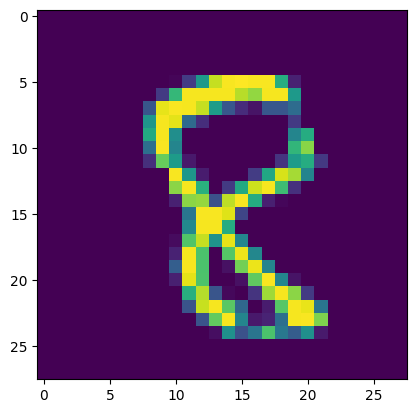

In [ ]:
# Plot trining data
plt.imshow(X_train[8][:,:,0])

In [ ]:
# Data Augmentation

# Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available
# for training models, without actually collecting new data. Data augmentation techniques such
#  as cropping, padding, and horizontal flipping are commonly used to train large neural networks.

datagenerate = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        )# randomly flip images
datagenerate.fit(X_train)

In [ ]:
# creating a Convutional Neural Network
# https://www.analyticsvidhya.com/blog/2017/06/architecture-of-convolutional-neural-networks-simplified-demystified/

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 dropout_6 (Dropout)         (None, 26, 26, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 dropout_7 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                      

In [ ]:
# model compiling
# model.compile is used to compile the model the loss is
# Categoriacal crossentopy since we are doing multiclass classification,
#  one can use Binary crossentropy for binary classification, The opitimizer is Adam,they basically optimize loss
#   and make trainning better and fast to read

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# model training
# We are using model.fit_generator that takes the augmented data,
#  I've defined epochs(number of times we will go through the model) as 5
#  (the larger the number of epochs the better the accuracy).

In [ ]:
# defining model parameters
batch_size = 64
epochs = 5
steps = len(X_train)

hist = model.fit_generator(datagenerate.flow(X_train, Y_train, batch_size=batch_size),
                           steps_per_epoch=steps//batch_size,
                           epochs=epochs, #Increase this when not on Kaggle kernel
                           verbose=1,  #1 for ETA, 0 for silent
                           validation_data=(X_val[:800], Y_val[:800]))

Epoch 1/5


<ipython-input-63-8525f42948d3>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagenerate.flow(X_train, Y_train, batch_size=batch_size),


492/492 [==============================] - 14s 23ms/step - loss: 0.8082 - accuracy: 0.7309 - val_loss: 0.0984 - val_accuracy: 0.9675
Epoch 2/5
492/492 [==============================] - 12s 24ms/step - loss: 0.2654 - accuracy: 0.9218 - val_loss: 0.0523 - val_accuracy: 0.9837
Epoch 3/5
492/492 [==============================] - 13s 26ms/step - loss: 0.1839 - accuracy: 0.9460 - val_loss: 0.0393 - val_accuracy: 0.9900
Epoch 4/5
492/492 [==============================] - 14s 27ms/step - loss: 0.1574 - accuracy: 0.9544 - val_loss: 0.0232 - val_accuracy: 0.9900
Epoch 5/5
492/492 [==============================] - 12s 25ms/step - loss: 0.1319 - accuracy: 0.9611 - val_loss: 0.0190 - val_accuracy: 0.9950


In [ ]:
# Plot traing and validation loss

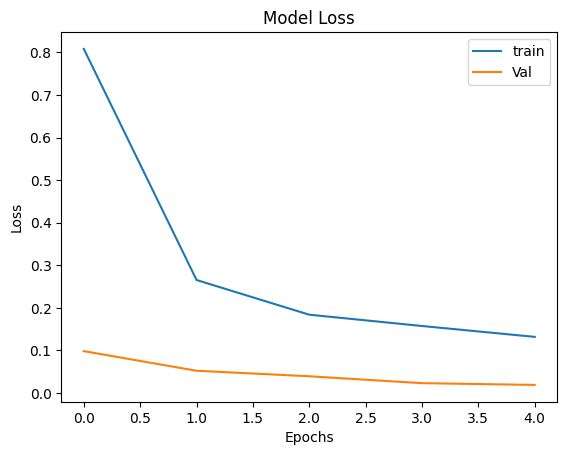

In [ ]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='Val')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
# Model Prediction
pred = model.predict(X_val)

329/329 [==============================] - 1s 2ms/step


In [ ]:
# confusion matrix
# Confusion Matrix for better understanding of True positive and Negative

In [ ]:
y_pred = np.argmax(pred, axis=1)
true_val = np.argmax(Y_val, axis=1)
out = confusion_matrix(true_val, y_pred)
print(out)

[[1028    0    1    1    0    0    2    0    4    0]
 [   0 1164    4    0    1    0    0    5    3    0]
 [   0    2 1041    3    0    0    0    5    4    0]
 [   1    0    2 1087    0    1    0    1    2    0]
 [   1    2    1    0 1001    0    2    1    0    5]
 [   0    0    0    6    0  932    3    1    4    3]
 [   1    0    0    0    0    0 1022    0    3    0]
 [   0    1    4    0    2    0    0 1087    0    0]
 [   0    1    3    1    0    1    0    0 1000    6]
 [   5    0    0    0    7    1    0    1    2 1028]]
